## Analysis 5: Finding out final pairs between the main attributes in the dataset

In [1]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from pylab import *
import numpy as np
import matplotlib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import FormatStrFormatter
from matplotlib_venn import venn3, venn3_circles

In [2]:
path=os.chdir("..")                   #Moving back one folder

In [3]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [4]:
final_path1= path+ "\\Data\\movie_metadata.csv"

In [5]:
final_path= path+"\\Data\\genre_sorted.csv" #setting up the final path in final_path

In [6]:
df1= pd.read_csv(final_path1)

In [7]:
df= pd.read_csv(final_path, encoding='ISO-8859-1')
#df.head()

In [8]:
df_clean = df[['budget', 'genres', 'gross', 'year','actors','director_name','imdb_score','net','net_percentage','movie_title','plot_keyword']].dropna()
df_plot_actor = pd.DataFrame(columns = ['actor','genres','plot_keyword' ,'budget', 'gross', 'year','director_name','imdb_score','net','net_percentage','movie_title',
                                  'cactor'])

def plotActorRemap(row):
    global df_plot_actor
    d = {}
    actors = np.array(row['actors'].split(','))
    n = actors.size
    d['plot_keyword']= [row['plot_keyword']]*n
    d['genres']= [row['genres']]*n
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['year']]*n
    d['director_name']= [row['director_name']]*n
    d['imdb_score']=[row['imdb_score']]*n
    d['net']= [row['net']]*n
    d['net_percentage']= [row['net_percentage']]*n
    d['movie_title']= [row['movie_title']]*n
    d['actor'], d['cactor'] = [], []

    for actor in actors:
        d['actor'].append(actor)
        d['cactor'].append(actors[actors != actor])

    df_plot_actor = df_plot_actor.append(pd.DataFrame(d), ignore_index = True)

df_clean.apply(plotActorRemap, axis = 1)
df_plot_actor['year'] = df_plot_actor['year'].astype(np.int16)
df_plot_actor = df_plot_actor[['actor','genres','plot_keyword' ,'budget', 'gross', 'year','director_name','imdb_score','net','net_percentage','movie_title',
                                  'cactor']]

In [9]:
df_plot_actor.head()

,actor,genres,plot_keyword,budget,gross,year,director_name,imdb_score,net,net_percentage,movie_title,cactor
0,CCH Pounder,Action|Adventure|Fantasy|Sci-Fi,avatar,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[Joel David Moore, Wes Studi]"
1,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,avatar,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[CCH Pounder, Wes Studi]"
2,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[CCH Pounder, Joel David Moore]"
3,CCH Pounder,Action|Adventure|Fantasy|Sci-Fi,future,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[Joel David Moore, Wes Studi]"
4,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,future,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[CCH Pounder, Wes Studi]"


In [11]:
df_plot_actor.head()

,actor,genres,plot_keyword,budget,gross,year,director_name,imdb_score,net,net_percentage,movie_title,cactor
0,CCH Pounder,Action|Adventure|Fantasy|Sci-Fi,avatar,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[Joel David Moore, Wes Studi]"
1,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,avatar,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[CCH Pounder, Wes Studi]"
2,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[CCH Pounder, Joel David Moore]"
3,CCH Pounder,Action|Adventure|Fantasy|Sci-Fi,future,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[Joel David Moore, Wes Studi]"
4,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,future,237000000.0,760505847.0,2009,James Cameron,7.9,523505847.0,220.888543,Avatar,"[CCH Pounder, Wes Studi]"


## Action vs other Genre's

In [20]:
%matplotlib inline

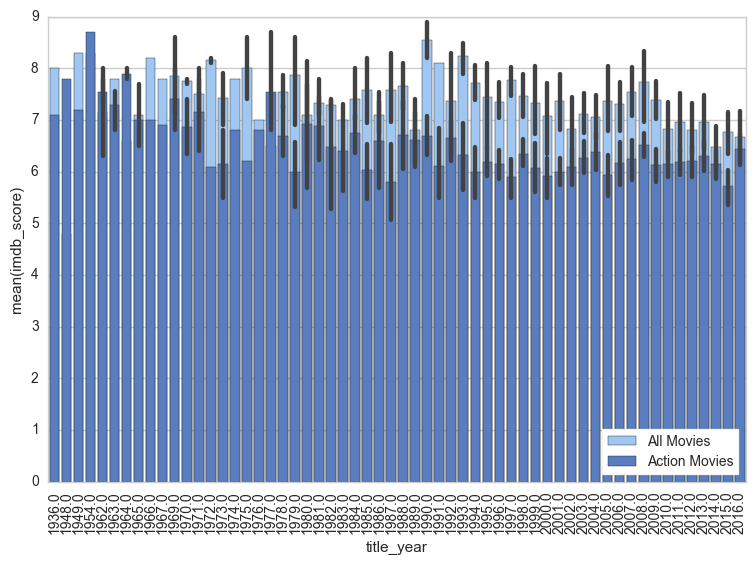

In [28]:
df_action = df1.loc[df1['genres'].str.contains('Action')]

sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(9, 6))

sns.set_color_codes("pastel")
sns.barplot(x="title_year", y="imdb_score", data=df1,
            label="All Movies", color="b")

sns.set_color_codes("muted")
sns.barplot(x="title_year", y="imdb_score", data=df_action,
            label="Action Movies", color="b")

ax.legend(loc="lower right", frameon=True)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
sns.plt.figure()

## Which is the most worked Pair in Hollywood in the action Genre?

In [26]:
df1_action= df1.loc[df1['genres'].str.contains('Action')].dropna()
df_dir_act_action = pd.melt(df1_action,id_vars=['director_name'], value_vars=['actor_1_name','actor_2_name','actor_3_name'], value_name='actor').dropna()
# df_dir_act_sort_action
df_dir_act_sort_action= df_dir_act_action[['director_name','actor']].groupby(['director_name','actor']).size().sort_values(ascending = False).reset_index()[:40]

In [27]:
df_dir_act_sort_action.head()

,director_name,actor,0
0,Robert Rodriguez,Alexa PenaVega,5
1,Rob Cohen,Vin Diesel,4
2,Tony Scott,Denzel Washington,4
3,Sam Raimi,J.K. Simmons,4
4,Gore Verbinski,Johnny Depp,4


## best Action actor director pair?

In [ ]:
df_action= df_plot_actor.loc[df_plot_actor['genres'].str.contains('Action')]

In [577]:
df_pivot_imdb= pd.pivot_table(df_action, index=('director_name','actor'),values='imdb_score', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_imdb_sort= df_pivot.sort_values(by='imdb_score', ascending=False)[:40]
df_pivot_imdb_sort_list_action=df_pivot_imdb_sort[['director_name','actor']].values.tolist()

In [579]:
len(df_pivot_imdb_sort_list_action)

40

In [580]:
df_pivot_gross= pd.pivot_table(df_action, index=('director_name','actor'),values='gross', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_gross_sort= df_pivot_gross.sort_values(by='gross', ascending=False)[:40]
df_pivot_gross_sort_list_action=df_pivot_gross_sort[['director_name','actor']].values.tolist()
len(df_pivot_gross_sort_list_action)

40

In [581]:
df1_action= df1.loc[df1['genres'].str.contains('Action')].dropna()
df_dir_act_action = pd.melt(df1_action,id_vars=['director_name'], value_vars=['actor_1_name','actor_2_name','actor_3_name'], value_name='actor').dropna()
# df_dir_act_sort_action
df_dir_act_sort_action= df_dir_act_action[['director_name','actor']].groupby(['director_name','actor']).size().sort_values(ascending = False).reset_index()[:40]
df_dir_act_sort_list_action=df_dir_act_sort_action[['director_name','actor']].values.tolist()
len(df_dir_act_sort_list_action)

40

In [582]:
result_action1=[word for word in df_pivot_gross_sort_list_action if word in df_pivot_imdb_sort_list_action]

In [591]:
len(result_action1)

9

In [584]:
result_final_action= [word for word in df_dir_act_sort_list_action if word in result_action1 ]

In [586]:
(result_final_action)

[['Christopher Nolan', 'Christian Bale']]

## Thriller vs other Genre's

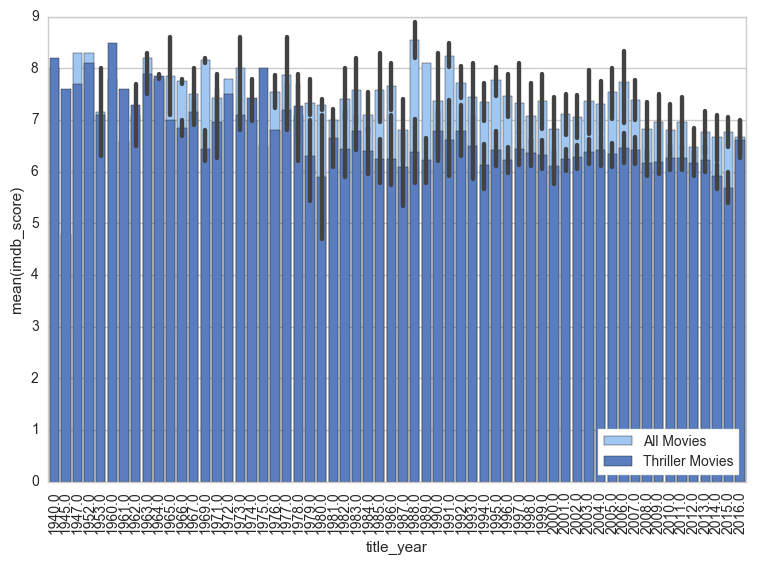

In [30]:
df_thriller = df1.loc[df1['genres'].str.contains('Thriller')]

sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(9, 6))

sns.set_color_codes("pastel")
sns.barplot(x="title_year", y="imdb_score", data=df1,
            label="All Movies", color="b")

sns.set_color_codes("muted")
sns.barplot(x="title_year", y="imdb_score", data=df_thriller,
            label="Thriller Movies", color="b")

ax.legend(loc="lower right", frameon=True)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
sns.plt.figure()

##  Which is the most worked Pair in Hollywood in the action Thriller?

In [31]:
df1_thriller= df1.loc[df1['genres'].str.contains('Thriller')].dropna()
df_dir_act_thriller = pd.melt(df1_thriller,id_vars=['director_name'], value_vars=['actor_1_name','actor_2_name','actor_3_name'], value_name='actor').dropna()
# df_dir_act_sort_action
df_dir_act_sort_thriller= df_dir_act_thriller[['director_name','actor']].groupby(['director_name','actor']).size().sort_values(ascending = False).reset_index()[:60]
df_dir_act_sort_list_thriller=df_dir_act_sort_thriller[['director_name','actor']].values.tolist()
len(df_dir_act_sort_list_thriller)

60

In [32]:
df_dir_act_sort_thriller.head()

,director_name,actor,0
0,Tony Scott,Denzel Washington,4
1,Paul Greengrass,Matt Damon,4
2,Rob Cohen,Vin Diesel,4
3,Rob Cohen,Paul Walker,4
4,Clint Eastwood,Clint Eastwood,4


## best Thriller Director actor pair?


In [33]:
df_thriller= df_plot_actor.loc[df_plot_actor['genres'].str.contains('Thriller')]

In [35]:
df_pivot_imdb= pd.pivot_table(df_thriller, index=('director_name','actor'),values='imdb_score', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_imdb_sort= df_pivot_imdb.sort_values(by='imdb_score', ascending=False)[:60]
df_pivot_imdb_sort_list_thriller=df_pivot_imdb_sort[['director_name','actor']].values.tolist()

In [36]:
df_pivot_gross= pd.pivot_table(df_thriller, index=('director_name','actor'),values='gross', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_gross_sort= df_pivot_gross.sort_values(by='gross', ascending=False)[:60]
df_pivot_gross_sort_list_thriller=df_pivot_gross_sort[['director_name','actor']].values.tolist()
len(df_pivot_gross_sort_list_thriller)

60

In [37]:
result_thriller1=[word for word in df_pivot_gross_sort_list_thriller if word in df_pivot_imdb_sort_list_thriller]
len(result_thriller1)

7

In [38]:
result_final_thriller= [word for word in df_dir_act_sort_list_thriller if word in result_thriller1 ]

In [39]:
result_final_thriller

[['Christopher Nolan', 'Christian Bale'],
 ['Christopher Nolan', 'Joseph Gordon-Levitt']]

## Drama vs other genre

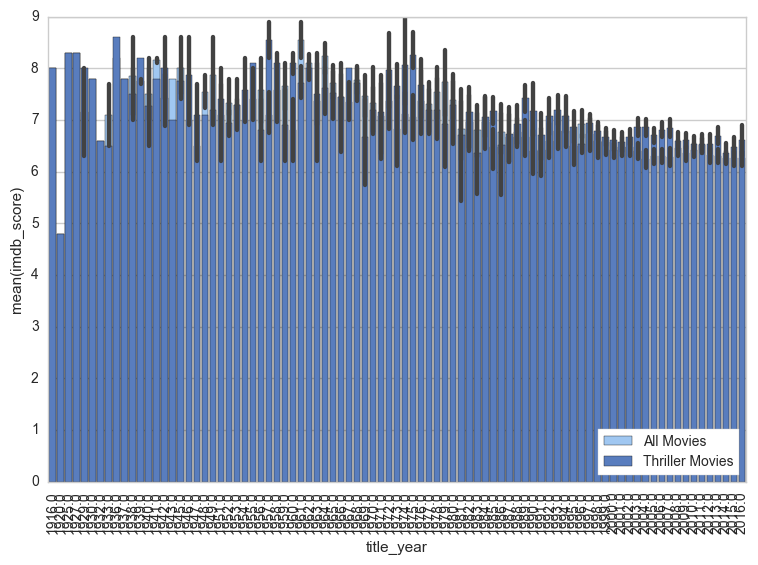

In [40]:
df_drama = df1.loc[df1['genres'].str.contains('Drama')]

sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(9, 6))

sns.set_color_codes("pastel")
sns.barplot(x="title_year", y="imdb_score", data=df1,
            label="All Movies", color="b")

sns.set_color_codes("muted")
sns.barplot(x="title_year", y="imdb_score", data=df_drama,
            label="Thriller Movies", color="b")

ax.legend(loc="lower right", frameon=True)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
sns.plt.figure()

##  Which is the most worked Pair in Hollywood in the action Drama?

In [596]:
df1_drama= df1.loc[df1['genres'].str.contains('Drama')].dropna()
df_dir_act_drama = pd.melt(df1_drama,id_vars=['director_name'], value_vars=['actor_1_name','actor_2_name','actor_3_name'], value_name='actor').dropna()
# df_dir_act_sort_action
df_dir_act_sort_drama= df_dir_act_drama[['director_name','actor']].groupby(['director_name','actor']).size().sort_values(ascending = False).reset_index()[:40]
df_dir_act_sort_list_drama=df_dir_act_sort_drama[['director_name','actor']].values.tolist()
len(df_dir_act_sort_list_drama)

40

In [597]:
df_dir_act_sort_drama.head()

,director_name,actor,0
0,Clint Eastwood,Clint Eastwood,6
1,Wes Anderson,Bill Murray,5
2,Darren Aronofsky,Mark Margolis,5
3,Jason Reitman,J.K. Simmons,5
4,Spike Lee,Denzel Washington,4


## best actor director pair in Drama?

In [599]:
df_drama= df_plot_actor.loc[df_plot_actor['genres'].str.contains('Drama')]

In [600]:
df_pivot_imdb= pd.pivot_table(df_drama, index=('director_name','actor'),values='imdb_score', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_imdb_sort= df_pivot.sort_values(by='imdb_score', ascending=False)[:40]
df_pivot_imdb_sort_list_drama=df_pivot_imdb_sort[['director_name','actor']].values.tolist()

In [601]:
df_pivot_gross= pd.pivot_table(df_drama, index=('director_name','actor'),values='gross', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_gross_sort= df_pivot_gross.sort_values(by='gross', ascending=False)[:40]
df_pivot_gross_sort_list_drama=df_pivot_gross_sort[['director_name','actor']].values.tolist()
len(df_pivot_gross_sort_list_drama)

40

In [604]:
result_drama1=[word for word in df_pivot_gross_sort_list_drama if word in df_pivot_imdb_sort_list_drama]
len(result_drama1)

7

In [613]:
result_final_drama= [word for word in df_dir_act_sort_list_drama if word in result_drama1 ]
result_final_drama

[['Peter Jackson', 'Billy Boyd'], ['Peter Jackson', 'Orlando Bloom']]

## Comedy vs other Genre

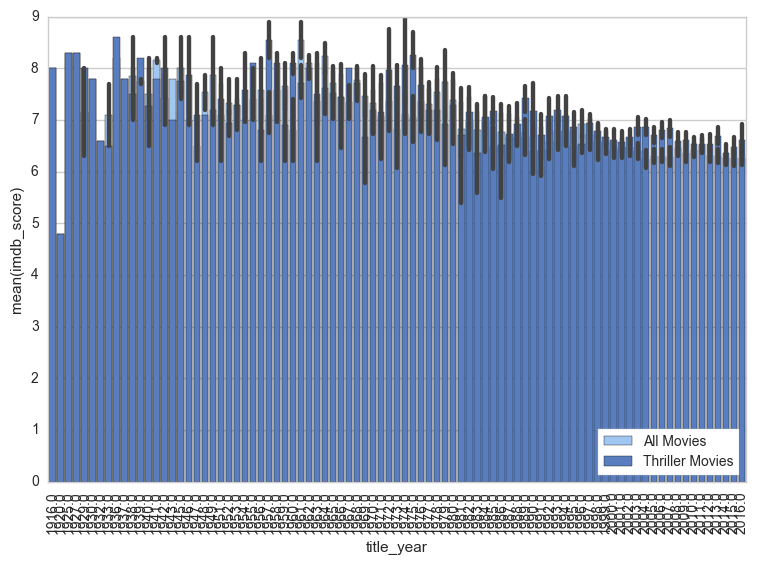

In [41]:
df_comedy = df1.loc[df1['genres'].str.contains('Drama')]

sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(9, 6))

sns.set_color_codes("pastel")
sns.barplot(x="title_year", y="imdb_score", data=df1,
            label="All Movies", color="b")

sns.set_color_codes("muted")
sns.barplot(x="title_year", y="imdb_score", data=df_comedy,
            label="Thriller Movies", color="b")

ax.legend(loc="lower right", frameon=True)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
sns.plt.figure()

## Which pair has worked together most number of times for genre Comedy

In [669]:
df1_comedy= df1.loc[df1['genres'].str.contains('Comedy')].dropna()
df_dir_act_comedy = pd.melt(df1_comedy,id_vars=['director_name'], value_vars=['actor_1_name','actor_2_name','actor_3_name'], value_name='actor').dropna()
# df_dir_act_sort_action
df_dir_act_sort_comedy= df_dir_act_comedy[['director_name','actor']].groupby(['director_name','actor']).size().sort_values(ascending = False).reset_index()[:500]
df_dir_act_sort_list_comedy=df_dir_act_sort_comedy[['director_name','actor']].values.tolist()
len(df_dir_act_sort_list_comedy)

500

In [670]:
df_dir_act_sort_comedy.head()

,director_name,actor,0
0,Woody Allen,Woody Allen,7
1,Dennis Dugan,Adam Sandler,7
2,Wes Anderson,Bill Murray,6
3,Adam McKay,Will Ferrell,5
4,Garry Marshall,Hector Elizondo,5


## best action director pair in Comedy genre

In [671]:
df_comedy= df_plot_actor.loc[df_plot_actor['genres'].str.contains('Comedy')]

In [672]:
df_pivot_imdb= pd.pivot_table(df_comedy, index=('director_name','actor'),values='imdb_score', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_imdb_sort= df_pivot.sort_values(by='imdb_score', ascending=False)[:500]
df_pivot_imdb_sort_list_comedy=df_pivot_imdb_sort[['director_name','actor']].values.tolist()

In [673]:
df_pivot_gross= pd.pivot_table(df_comedy, index=('director_name','actor'),values='gross', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_gross_sort= df_pivot_gross.sort_values(by='gross', ascending=False)[:500]
df_pivot_gross_sort_list_comedy=df_pivot_gross_sort[['director_name','actor']].values.tolist()
len(df_pivot_gross_sort_list_comedy)

500

In [674]:
result_comedy1=[word for word in df_pivot_gross_sort_list_comedy if word in df_pivot_imdb_sort_list_comedy]
len(result_comedy1)

39

In [675]:
result_final_comedy= [word for word in df_dir_act_sort_list_comedy if word in result_comedy1 ]
result_final_comedy

[['Phil Lord', 'Channing Tatum'],
 ['Gore Verbinski', 'Johnny Depp'],
 ['George Lucas', 'Harrison Ford']]

## Romance vs other genre

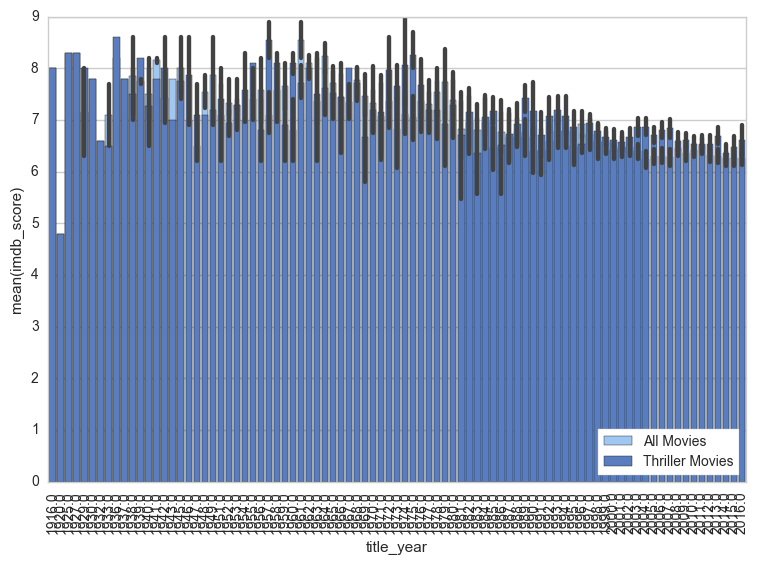

In [42]:
df_romance = df1.loc[df1['genres'].str.contains('Drama')]

sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(9, 6))

sns.set_color_codes("pastel")
sns.barplot(x="title_year", y="imdb_score", data=df1,
            label="All Movies", color="b")

sns.set_color_codes("muted")
sns.barplot(x="title_year", y="imdb_score", data=df_romance,
            label="Thriller Movies", color="b")

ax.legend(loc="lower right", frameon=True)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
sns.plt.figure()

## Which pair has worked together most number of times for genre Romance?


In [698]:
df1_romance= df1.loc[df1['genres'].str.contains('Romance')].dropna()
df_dir_act_romance = pd.melt(df1_romance,id_vars=['director_name'], value_vars=['actor_1_name','actor_2_name','actor_3_name'], value_name='actor').dropna()
# df_dir_act_sort_action
df_dir_act_sort_romance= df_dir_act_romance[['director_name','actor']].groupby(['director_name','actor']).size().sort_values(ascending = False).reset_index()[:200]
df_dir_act_sort_list_romance=df_dir_act_sort_romance[['director_name','actor']].values.tolist()
len(df_dir_act_sort_list_romance)

200

In [699]:
df_dir_act_sort_romance.head()

,director_name,actor,0
0,Woody Allen,Woody Allen,5
1,Sam Raimi,J.K. Simmons,5
2,Garry Marshall,Hector Elizondo,4
3,Sam Raimi,James Franco,4
4,Sam Raimi,Kirsten Dunst,4


In [700]:
df_romance= df_plot_actor.loc[df_plot_actor['genres'].str.contains('Romance')]

In [701]:
df_pivot_imdb= pd.pivot_table(df_romance, index=('director_name','actor'),values='imdb_score', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_imdb_sort= df_pivot.sort_values(by='imdb_score', ascending=False)[:200]
df_pivot_imdb_sort_list_romance=df_pivot_imdb_sort[['director_name','actor']].values.tolist()

In [702]:
df_pivot_gross= pd.pivot_table(df_romance, index=('director_name','actor'),values='gross', aggfunc=('mean'), fill_value='0').reset_index()
df_pivot_gross_sort= df_pivot_gross.sort_values(by='gross', ascending=False)[:200]
df_pivot_gross_sort_list_romance=df_pivot_gross_sort[['director_name','actor']].values.tolist()
len(df_pivot_gross_sort_list_romance)

200

In [703]:
result_romance1=[word for word in df_pivot_gross_sort_list_romance if word in df_pivot_imdb_sort_list_romance]
len(result_romance1)

10

In [704]:
result_final_romance= [word for word in df_dir_act_sort_list_romance if word in result_romance1 ]
result_final_romance

[['Kenneth Branagh', 'Derek Jacobi']]